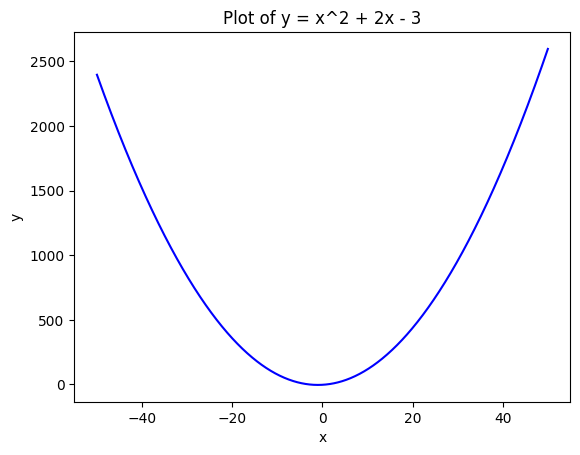

In [9]:
#二次抛物线
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 生成 x 值
x = np.linspace(-50, 50, 1000)  # 在区间[-5, 5]内生成100个均匀分布的点

# 计算对应的 y 值
y = x**2 + 2*x - 3

# 使用 Seaborn 创建曲线图
sns.lineplot(x=x, y=y, color="blue")

# 添加标签和标题
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = x^2 + 2x - 3")

# 显示图表
plt.show()

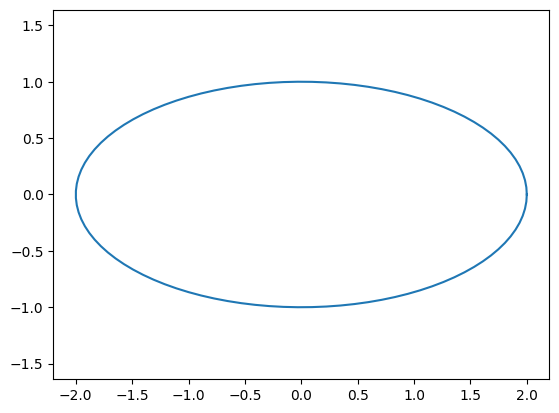

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# 定义椭圆的参数
h, k = 0, 0  # 中心坐标
a, b = 2, 1  # 半长轴和半短轴

# 生成椭圆上的点
theta = np.linspace(0, 2*np.pi, 100)
x = h + a * np.cos(theta)
y = k + b * np.sin(theta)

# 绘制椭圆
plt.plot(x, y)
plt.axis('equal')
plt.show()

C:\Users\LiJia-PC\AppData\Local\Temp\ipykernel_2428\2972596421.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((x**2/a**2 - 1) * b**2)


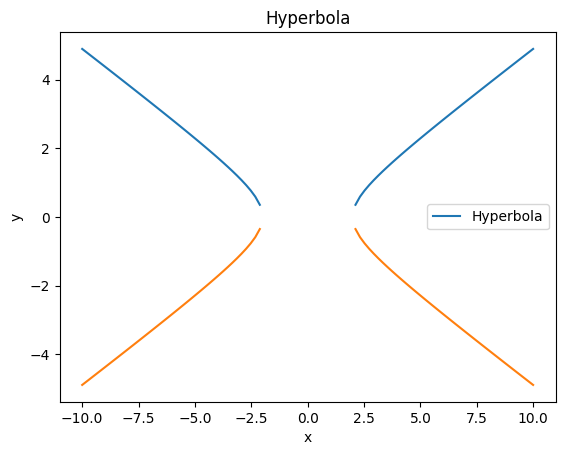

In [15]:
#定义双曲线函数
#标准方程: y²/a² - x²/b² = 1
#焦点在y轴
#a >0,b >0
# 双曲线在实际中的应用有通风塔，冷却塔，埃菲尔铁塔，广州塔等。
import numpy as np
import matplotlib.pyplot as plt

def hyperbola(x, a, b):
    return np.sqrt((x**2/a**2 - 1) * b**2)

fig, ax = plt.subplots()

a = 2
b = 1

x = np.linspace(-10, 10, 100)
y = hyperbola(x, a, b)

ax.plot(x, y, label='Hyperbola')
ax.plot(x, -y)
ax.set_title('Hyperbola')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.legend()
plt.show()
#python绘制双曲线
#https://blog.51cto.com/u_16213352/7426904

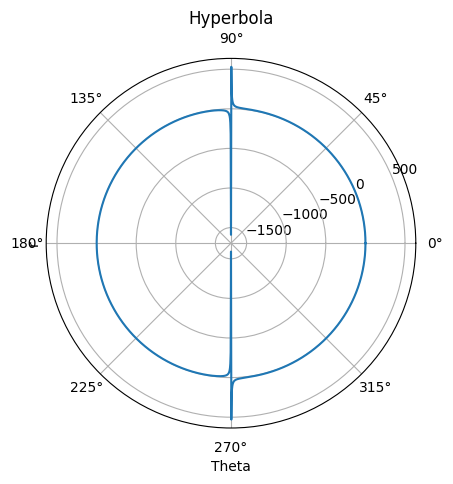

In [17]:
#双曲线，极坐标系
import numpy as np
import matplotlib.pyplot as plt

# 定义参数a
a = 1

# 生成theta的值
theta = np.linspace(0, 2 * np.pi, 2500)

# 计算对应的r值
r = a / np.cos(theta)

# 绘制极坐标图
plt.polar(theta, r)

# 设置标题和坐标轴标签
plt.title("Hyperbola")
plt.xlabel("Theta")
plt.ylabel("r")

# 显示图形
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


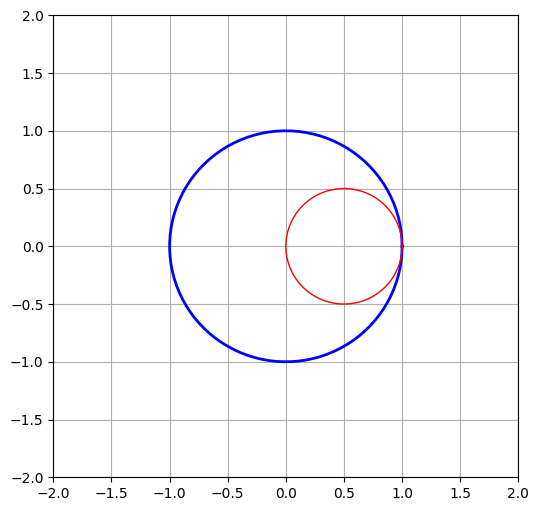

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
fig = plt.figure(figsize=(6, 6)) # 图像大小
ax = plt.gca()
ax.grid()
ln1, = ax.plot([], [], '-', color='b', lw=2) # 注意逗号，取出plot数据:plot return A list of Line2D objects representing the plotted data.
ln2, = ax.plot([], [], '-', color='r', lw=1)
theta = np.linspace(0, 2*np.pi, 100) # 参数t的数组
r_out = 1 # 静态圆的半径
r_in = 0.5 # 动态圆的半径
def init():
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    x_out = [r_out*np.cos(theta[i]) for i in range(len(theta))]
    y_out = [r_out*np.sin(theta[i]) for i in range(len(theta))]
    ln1.set_data(x_out, y_out) # 静圆
    return ln1, # 此处返回tuple
def update(i): # 每次回调时，传入索引`0~range(len(theta))`,注意repeat时索引会归0
    x_in = [(r_out-r_in)*np.cos(theta[i])+r_in*np.cos(theta[j]) for j in range(len(theta))]
    y_in = [(r_out-r_in)*np.sin(theta[i])+r_in*np.sin(theta[j]) for j in range(len(theta))]
    ln2.set_data(x_in, y_in) # 动圆
    return ln2,
ani = animation.FuncAnimation(fig, update, range(len(theta)), init_func=init, interval=30)
ani.save('roll.gif', writer='imagemagick', fps=100)
plt.show()

#python画给定椭圆方程曲线的代码 python画椭圆函数
#https://blog.51cto.com/u_16099176/7762369

[[1. 0. 0. 0. 0. 0.]
 [1. 4. 1. 0. 0. 0.]
 [0. 1. 4. 1. 0. 0.]
 [0. 0. 1. 4. 1. 0.]
 [0. 0. 0. 1. 4. 1.]
 [0. 0. 0. 0. 0. 1.]] [ 0. 18. -6. -6.  6.  0.] [ 0.          5.11004785 -2.44019139 -1.3492823   1.83732057  0.        ]


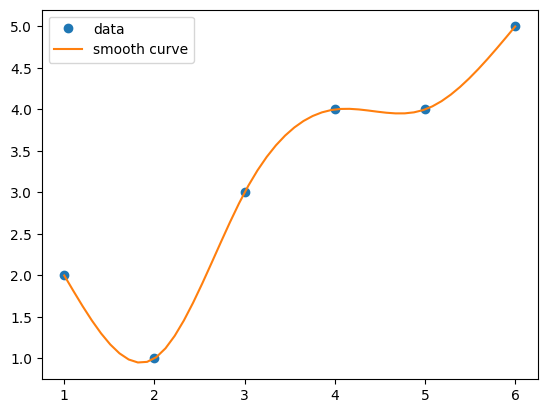

In [28]:
import numpy as np
import matplotlib.pyplot as plt


def solve_cubic_spline(x, y):
    n = len(x) - 1
    h = np.diff(x)


    # 构造三弯矩方程组的系数矩阵 A 和常数向量 b
    A = np.zeros((n + 1, n + 1))
    b = np.zeros(n + 1)

    A[0, 0] = 1
    A[n, n] = 1

    for i in range(1, n):
        A[i, i - 1] = h[i - 1]
        A[i, i] = 2 * (h[i - 1] + h[i])
        A[i, i + 1] = h[i]
        b[i] = 6 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1])

    # 解三弯矩方程组

    m = np.linalg.solve(A, b)
    print(A,b,m)
    # 计算曲线的系数
    a = y
    b = np.zeros(n)
    c = np.zeros(n + 1)
    d = np.zeros(n)

    for i in range(n):
        b[i] = (y[i + 1] - y[i]) / h[i] - h[i] * (m[i + 1] + 2 * m[i]) / 6
        c[i] = m[i] / 2
        d[i] = (m[i + 1] - m[i]) / (6 * h[i])

    return a, b, c, d


def cubic_spline(x, a, b, c, d, xi):
    n = len(x) - 1
    yi = np.zeros(len(xi))

    for i in range(len(xi)):
        for j in range(n):
            if xi[i] >= x[j] and xi[i] <= x[j + 1]:
                dx = xi[i] - x[j]
                yi[i] = a[j] + b[j] * dx + c[j] * dx ** 2 + d[j] * dx ** 3
                break

    return yi


# 构造数据
x = np.array([1, 2, 3, 4,5,6])
y = np.array([2, 1, 3, 4,4,5])

# 解三弯矩方程组
a, b, c, d = solve_cubic_spline(x, y)

# 生成插值点
xi = np.linspace(1, len(x), 50)

# 计算插值结果
yi = cubic_spline(x, a, b, c, d, xi)

# 画图
plt.plot(x, y, 'o', label='data')
plt.plot(xi, yi, label='smooth curve')
plt.legend(loc='best')
plt.show()

#用matplotlib画笛卡儿叶形线
#https://jingyan.baidu.com/article/ff411625ca5b0d12e582376a.html